In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\phase-3-data\phase-3-2\raw.githubusercontent.com_dsrscientist_dataset3_main_weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(8425, 23)

In [4]:
data.drop(['Date'],inplace=True,axis=1) # remove unwanted column

In [5]:
data.isna().sum()  #checking null values

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
data=data.dropna()  # we delete null values bcz if we fill data with then our model is baised

In [7]:
data.isna().sum()  #checking null values

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
907,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,ESE,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,Yes,Yes
908,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,S,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,Yes,Yes
909,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,ESE,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No
910,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,ENE,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No
911,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,NE,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,No,Yes


In [9]:
#separting numerical and categorical values
# for categorical
categorical=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical.append(i)
print('categorical=',categorical)
print('\n')
# for numerical
numerical=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical.append(i)
print('numerical=',numerical)


categorical= ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


numerical= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [10]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,14.071029,24.733483,2.451768,5.292533,7.852744,41.203958,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201
std,5.161176,6.068364,7.772025,3.642341,3.816696,13.857829,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000
25%,10.200000,20.300000,0.000000,2.800000,5.200000,31.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000
50%,14.000000,24.100000,0.000000,4.600000,8.900000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000
75%,17.900000,29.200000,0.800000,7.000000,10.800000,50.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000
max,28.500000,43.600000,168.400000,37.000000,13.900000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000


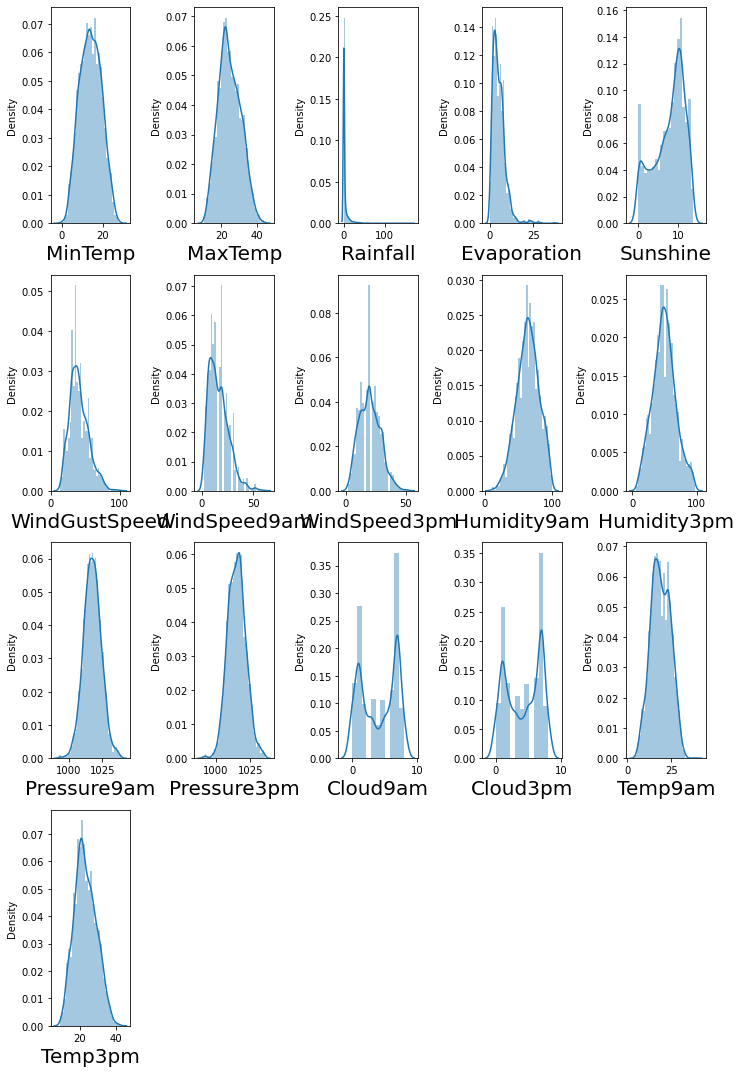

In [11]:
#cheking ditribution of plot
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=22:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

In [12]:
# fixing outlier with z score
from scipy.stats import zscore
z_score=zscore(data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])
abs_z_score=np.abs(z_score)
filtering_enter=(abs_z_score<3).all(axis=1)
data=data[filtering_enter]  # reasining filter data to main data
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000
mean,13.977339,24.689254,1.633853,5.036164,7.931236,40.462416,15.944321,19.798998,63.452673,49.145880,1017.670184,1015.200585,4.060969,4.151169,18.901197,23.205735
std,5.168120,6.011915,4.090144,2.980478,3.776372,13.016098,8.884338,8.450173,15.947700,17.442283,6.341425,6.299758,2.764680,2.637841,5.506058,5.877524
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,15.000000,7.000000,999.300000,996.700000,0.000000,0.000000,4.500000,9.400000
25%,10.100000,20.300000,0.000000,2.600000,5.400000,31.000000,9.000000,13.000000,53.000000,37.000000,1013.300000,1010.600000,1.000000,1.000000,14.900000,19.100000
50%,13.900000,24.100000,0.000000,4.600000,9.000000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.500000,1015.200000,4.000000,5.000000,18.600000,22.700000
75%,17.800000,29.125000,0.400000,7.000000,10.800000,48.000000,22.000000,26.000000,75.000000,60.000000,1021.800000,1019.400000,7.000000,7.000000,23.200000,27.300000
max,27.800000,41.800000,25.600000,16.200000,13.900000,81.000000,44.000000,46.000000,99.000000,97.000000,1037.100000,1034.100000,8.000000,8.000000,32.800000,40.500000


# Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [14]:
for i in (categorical):
    if data.dtypes[i]=='object':
        data[i] = lab_enc.fit_transform(data[i])

# To find the relation between feature we use heat map

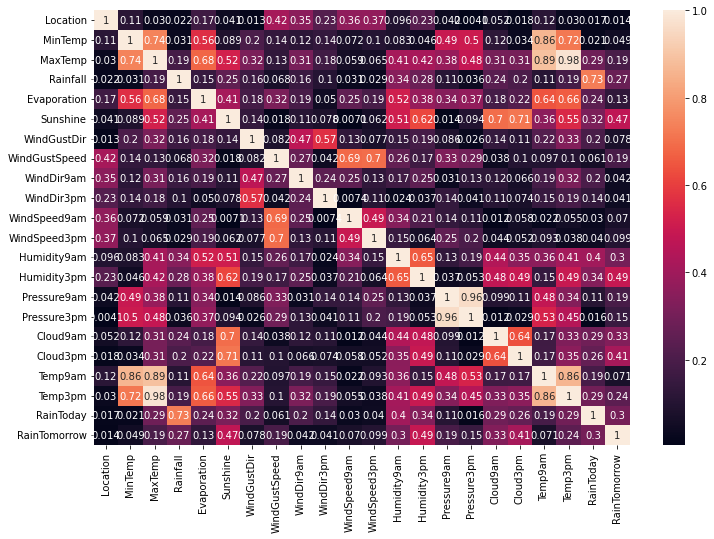

In [15]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(12,8))
sns.heatmap(relation,annot=True)
plt.show()

In [16]:
# corelation with label
relation['RainToday'].sort_values(ascending=False) # cheking corelation

RainToday        1.000000
Rainfall         0.728329
Humidity9am      0.401919
Humidity3pm      0.336239
Sunshine         0.319208
RainTomorrow     0.302241
Temp3pm          0.294386
Cloud9am         0.291052
MaxTemp          0.286447
Cloud3pm         0.263685
Evaporation      0.244736
WindDir9am       0.200974
WindGustDir      0.198185
Temp9am          0.189460
WindDir3pm       0.138492
Pressure9am      0.108005
WindGustSpeed    0.061442
WindSpeed3pm     0.039753
WindSpeed9am     0.030160
MinTemp          0.021268
Location         0.017465
Pressure3pm      0.015533
Name: RainToday, dtype: float64

In [17]:
data['RainToday'].unique()

array([1, 0])

In [18]:
#seprating features and label
x=data.drop(columns=['RainToday'])
y=data['RainToday']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=59)

In [23]:
#initiate knn classifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

# I selected RandomForestClassifier() this because it clasification data

In [21]:
##write one funtion and call as many as time to check accuracy score of different model
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n========== Train Result========')
        print(f'Accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train==False:
    
        pred=clf.predict(x_test)
        
        print('\n========== Test Result========')
        print(f'Accuracy score: {accuracy_score(y_test,pred)*100:.2f}%')

        print('\n\n Test classification Report\n',classification_report(y_test,pred,digits=2))

In [24]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) #train
metric_score(clf,x_train,x_test,y_train,y_test, train=False)#test


========== Train Result========
Accuracy score: 100.00%

========== Test Result========
Accuracy score: 100.00%


 Test classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       226

    accuracy                           1.00      1078
   macro avg       1.00      1.00      1.00      1078
weighted avg       1.00      1.00      1.00      1078



In [25]:
y_pred=clf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[852,   0],
       [  0, 226]], dtype=int64)

# here we get 100% resut no need for hyper tunning